<a href="https://colab.research.google.com/github/zilavalencia/ChungaraVZila-IA-SIS420/blob/main/Segundo%20Parcial/parcial2_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo Parcial

---

Chungara Valencia Zila

Inenieria de Sistemas

## Venta de casas en el condado de King, EE. UU.
## Predecir el precio de la vivienda

Este conjunto de datos contiene precios de venta de viviendas para el condado de King, que incluye Seattle. Incluye viviendas vendidas entre mayo de 2014 y mayo de 2015.

In [ ]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import silhouette_score

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Leemos el dataset

In [ ]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

data = pd.read_csv('/content/drive/MyDrive/ia/pregunta1_1/kc_house_data.csv', delimiter=",")

data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Eliminamos Columnas Irrelevantes

In [ ]:
# Eliminar las columnas 'id' y 'date'
data.drop(columns=['id', 'date'], inplace=True)

# Mover la columna 'price' al final
columns = list(data.columns)
columns.append(columns.pop(columns.index('price')))
data = data[columns]

# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

scaled_data


array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.9433552 ,
        -0.26071541, -0.86671733],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.43268619,
        -0.18786773, -0.00568792],
       [-1.47395936, -1.44746357, -1.42625404, ...,  1.07013975,
        -0.17237524, -0.98084935],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -1.41025258,
        -0.39414129, -0.37586519],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.8412214 ,
        -0.42051149, -0.38158814],
       [-1.47395936, -1.77207762, -1.15404732, ..., -1.41025258,
        -0.41794772, -0.58588173]])

# Inicializamos el KMEANS

In [ ]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42 , n_init=10)


y_pred = kmeans.fit_predict(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_pred

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

# Mostramos los centroides

In [ ]:
kmeans.cluster_centers_

array([[-0.30728258, -0.64992421, -0.5424601 , -0.10719815, -0.65030381,
        -0.05794983, -0.12382925,  0.29299613, -0.6066161 , -0.62647382,
         0.04645491, -0.644737  ,  0.02829564,  0.30505325,  0.04742751,
        -0.37509498, -0.52249806, -0.11640899, -0.34235535],
       [ 0.82247658,  1.23974454,  1.69987584,  0.56552184,  0.54556258,
         0.4283277 ,  1.01645718, -0.07632585,  1.5305219 ,  1.49446866,
         0.73135502,  0.35580932,  0.25991618, -0.23327198,  0.240329  ,
         0.32183591,  1.50891165,  0.58667784,  1.58286367],
       [ 0.12162402,  0.45868778,  0.11479449, -0.06984623,  0.73900902,
        -0.08717263, -0.22705458, -0.40126398,  0.27764392,  0.321454  ,
        -0.36324055,  0.80727299, -0.14647057, -0.35579157, -0.16678679,
         0.42337633,  0.16232066, -0.06479088, -0.13310382]])

# Predecimos

In [ ]:

# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_data[np.random.choice(scaled_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("Predicciones de cluster para las nuevas muestras:")
print(y_pred)

Muestras seleccionadas:
[[-0.39873715  1.47406291  0.63162876  0.06627383  1.86247216 -0.08717263
  -0.30575946 -0.62918687  0.29191561  1.05257695 -0.65868104  1.463768
  -0.21012839 -1.26981297 -1.82124423  1.44076892 -0.97253628 -0.03268644
  -0.43879034]
 [ 3.90215168  2.77251912  2.82017079  0.19333942  0.93650577 -0.08717263
   2.30418496 -0.62918687  2.84416969  3.47990264 -0.65868104  0.71477399
  -0.21012839 -0.72779528  0.42037578 -0.09304873  1.82884799  0.04188263
   5.20243682]
 [ 0.67648506 -0.47362141 -0.17410313 -0.18474288 -0.915427   -0.08717263
  -0.30575946  0.90755354 -0.55883575 -1.00038508  1.51049281 -1.08962069
   4.67945823  0.87956753  1.08651077 -0.51200818 -0.0971037  -0.19460678
   0.08556322]
 [-0.39873715  0.50022075 -0.59874561 -0.29495653  0.93650577 -0.08717263
  -0.30575946 -0.62918687 -0.55883575 -0.31203899 -0.65868104  1.02118063
  -0.21012839  0.56183302 -0.12018229 -0.56171523 -0.65154434 -0.36180117
  -0.59950131]]
Predicciones de cluster para 

<h1> CALCULAMOS EL VALOR OPTIMO DE CLOUSTERS USANDO EL METODO DEL CODO Y EL METODO DE LA SILUETA</h1>

# **Metodo del Codo**

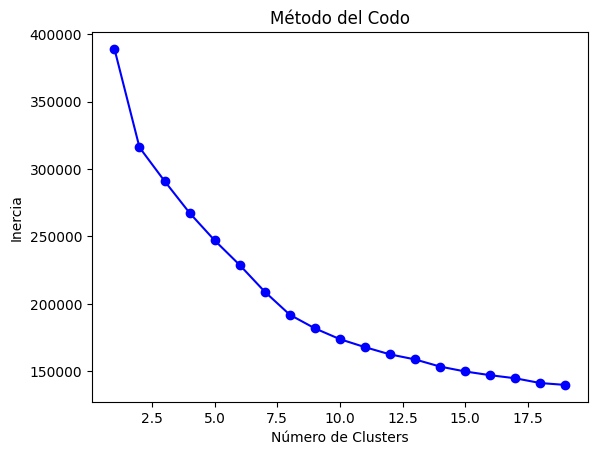

In [ ]:
##METODO DEL CODO
none_y = scaled_data[:, :-1]

inertias = []
k_range = range(1, 20)  # Prueba con un rango de 1 a 20 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(none_y)
    inertias.append(kmeans.inertia_)

# Graficar la curva de inercia
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()
best_codo_index = np.argmin(inertias)
best_num_clusters_codo = best_codo_index + 1  # Sumamos 1 ya que comenzamos desde 1 cluster

# **Metodo de la Silueta**

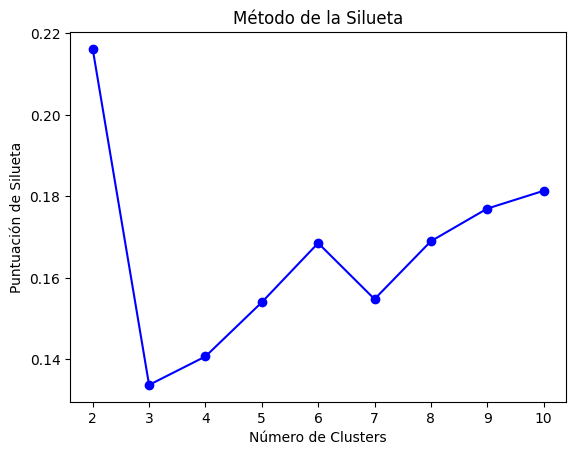

El número óptimo de clusters según la puntuación de silueta es: 2


In [ ]:
##METODO DE LA SILUETA
silhouette_scores = []
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)

# **SEPARAMOS EN PRUEBA Y ENTRENAMIENTO 80% - 20%**

In [ ]:
# Separar los datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_data
y_train = train_data['price']
X_test = test_data
y_test = test_data['price']

print('-' * 80)
print(f"El 80% de ejemplos que serán para el entrenamiento son: {len(X_train)}")
print(f"El 20% de ejemplos que serán para el prueba son: {len(X_test)}")

--------------------------------------------------------------------------------
El 80% de ejemplos que serán para el entrenamiento son: 17290
El 20% de ejemplos que serán para el prueba son: 4323


## **eliminamos la y**

In [ ]:
none_y

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [ ]:
X_train_

array([[-0.39526335, -0.47445144, -0.32393262, ...,  1.12607326,
         0.01344043, -0.58864574],
       [-1.46896378, -1.45258323, -1.18365301, ..., -1.04652268,
        -0.28066159, -0.77677507],
       [-0.39526335, -1.45258323, -1.09547656, ..., -1.19331971,
        -0.1789339 , -0.85562339],
       ...,
       [-0.39526335,  0.50368036,  0.05081729, ..., -0.42997519,
        -0.36604019,  0.10300621],
       [-2.54266422, -1.77862716, -1.8670205 , ..., -1.19331971,
         0.08265159, -0.80997436],
       [ 0.67843709,  0.50368036,  1.16404497, ...,  1.52242522,
        -0.24443927, -0.61631182]])

# **Añadimos la columna Kmeans3 con las nuevas etiquetas **

In [ ]:
# KMeans clustering on training data
kmeans = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
kmeans.fit(X_train_)
train_data['kmeans3'] = kmeans.labels_

# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# Transformamos los datos de entrenamiento en distancias euclidianas a los centroides
X_digits_dist = kmeans.transform(X_train_)


In [ ]:
print(X_digits_dist.shape)
print(X_digits_dist)

(17290, 2)
[[3.31643985 3.71580219]
 [2.6501524  6.32319372]
 [2.48587352 5.92886206]
 ...
 [3.33197255 3.10709839]
 [4.21915278 7.66480344]
 [4.74554714 2.88121408]]


# **Visualizamos el Score**

In [ ]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_train)
silhouette_avg = silhouette_score(X_train, y_pred) # Calculamos el score del modelo
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4904964484026139
